In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score , recall_score
from imblearn.over_sampling import SMOTE 


data_df = pd.read_csv('NEW_dataset_csv.csv')
book=pd.read_csv('Book1.csv')
print(data_df.shape)
data_df.head()

(460846, 34)


C:\Users\Sa\AppData\Local\Temp\ipykernel_18248\4030293889.py:13: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv('NEW_dataset_csv.csv')


,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,I01,N,163,165,0.069610,-0.083281,0.614133,-0.392761,0.047159,15,...,-0.023370,14,3,23,6,-0.023370,-0.011650,0.082608,0.101373,-0.183387
1,I01,N,165,166,-0.097030,0.597254,-0.078704,-0.078704,-0.137781,3,...,0.081637,15,5,27,7,0.081637,0.102992,0.191225,0.217544,-0.068248
2,I01,N,166,102,0.109399,0.680528,-0.010649,-0.010649,-0.720620,6,...,-0.148539,33,13,52,6,-0.148539,-0.060620,0.081080,0.204400,0.335172
3,I01,VEB,102,231,0.176376,0.256431,-0.101098,-0.707525,-0.101098,4,...,0.046898,21,9,34,4,0.046898,0.083728,0.279512,0.526785,0.450969
4,I01,N,231,165,0.585577,0.607461,-0.083499,-0.083499,-0.167858,3,...,-0.112552,32,5,43,6,-0.112552,0.012989,0.091491,0.134004,0.265232


In [3]:
x_data = data_df.iloc[:, 2:]
y_label = data_df[['type']]
z_label = data_df[['type']]
z_label.value_counts()
y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
y_label.replace(['N'], 'Normal', inplace=True)
smote=SMOTE()


C:\Users\Sa\AppData\Local\Temp\ipykernel_18248\3639858140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['VEB', 'SVEB', 'F', 'Q'], 'Arrhythmia', inplace=True)
C:\Users\Sa\AppData\Local\Temp\ipykernel_18248\3639858140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_label.replace(['N'], 'Normal', inplace=True)


In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y_label)
y = pd.DataFrame(Y)  
y.value_counts()
y
x_re,y_re = smote.fit_resample(x_data,y)

C:\Users\Sa\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_re, y_re, random_state=101,test_size=0.3)

In [6]:
y_test

,0
569904,0
634201,0
154257,0
128457,1
420120,1
...,...
810922,0
468398,0
61052,1
92764,1


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier


steps=[( "normal",MinMaxScaler()),
      ("clf",XGBClassifier(random_state=10))]
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('normal', MinMaxScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=10, ...))])

In [8]:
pip install scikit-optimize


Note: you may need to restart the kernel to use updated packages.


In [9]:
from skopt import BayesSearchCV
from skopt.space import Real,Categorical,Integer

search_space={
    'clf__max_depth': Integer(2,8),
'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
'clf__subsample': Real(0.5, 1.0),
'clf__colsample_bytree': Real(0.5,1.0),
'clf__colsample_bylevel': Real(0.5, 1.0),
'clf__colsample_bynode' : Real(0.5, 1.0),
'clf__reg_alpha': Real(0.0, 10.0),
'clf__reg_lambda': Real(0.0, 10.0),
'clf__gamma': Real(0.0, 10.0)
}
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='accuracy', random_state=8)

In [10]:
opt.fit(X_train,y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('normal', MinMaxScaler()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type=Non...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [11]:
opt.best_estimator_

Pipeline(steps=[('normal', MinMaxScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9425384185492701,
                               colsample_bynode=0.9095956806239844,
                               colsample_bytree=0.706128679361455, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.6598135411398998,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.7929828265552742, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=10, ...))])

In [12]:
opt.best_score_

0.9863575482623127

In [13]:
y_pred=opt.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
accuracy_score(y_test,y_pred)

0.9884063327789072

In [15]:
confusion_matrix(y_test,y_pred)

array([[120328,   1280],
       [  1543, 120344]], dtype=int64)

In [16]:
recall_score(y_test,y_pred,pos_label=0)

0.9894743766857443

In [17]:
precision_score(y_test,y_pred,pos_label=0)

0.9873390716413256

In [19]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred)

0.976812692508597

In [44]:
f1_score(y_test, y_pred)

0.9884070945460369

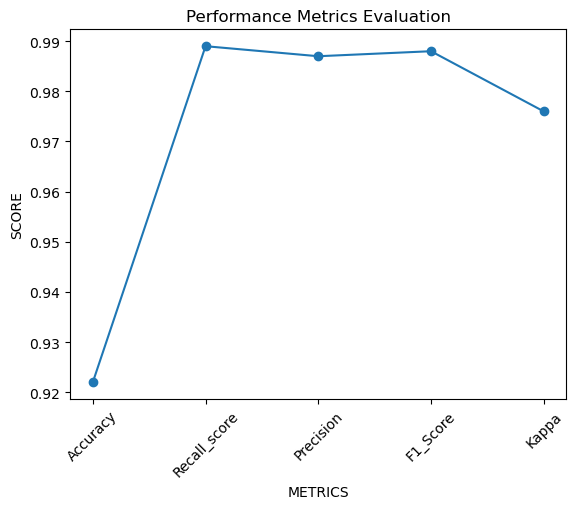

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Use descriptive text directly as x values
x_labels = np.array(["Accuracy", "Recall_score", "Precision", "F1_Score", "Kappa"])
y = np.array([0.922, 0.989, 0.987, 0.988,0.976])

plt.plot(x_labels, y, marker='o')  # Use text labels as x-axis values

plt.xlabel("METRICS")
plt.ylabel("SCORE")
plt.title("Performance Metrics Evaluation")

plt.xticks(rotation=45)  
plt.show()